# Part II - Prosper Loan Data Findings
## by Olaniyan Daniel Olusegun

## Investigation Overview


> In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the borrower's Prosper rating, loan Term, Estimated Loss and Estimatted Return.


## Dataset Overview

> This document explores a datas, et containing borrower's APR and attributes (such as Proper Rating, Loan Term, Estimated Loss, Estimatted Return and many others) for approximately 113937 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('loan_data_cleaned.csv')


## Distribution of Borrower APR

> The distribution of APR looks multimodal. A small peak centered at 0.09, a large peak centered at 0.18. There is also a small peak centered 0.29. Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.41.

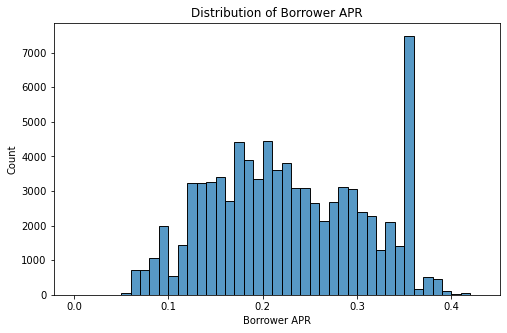

In [3]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, loan_data['borrower_apr'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.histplot(x='borrower_apr', data=loan_data, bins=bins)
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR');
plt.show()

## Distribution of Loan Status

> The highest loan status is Current, followed by Completed then Chargedoff

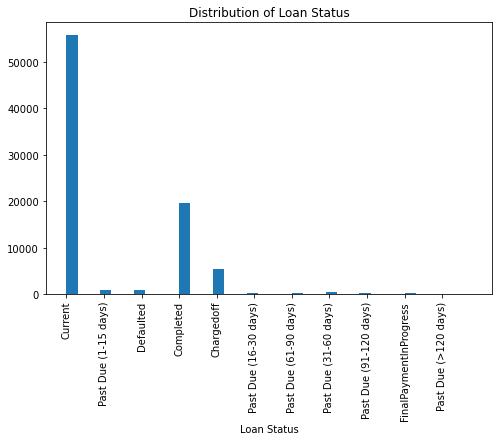

In [4]:
status = len(loan_data['loan_status'].unique())
bins = np.arange(0, status, 0.3)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'loan_status', bins=bins);
plt.xlabel('Loan Status');
plt.xticks(rotation=90);
plt.title('Distribution of Loan Status');

## Borrower APR vs. Prosper Rating


> The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.


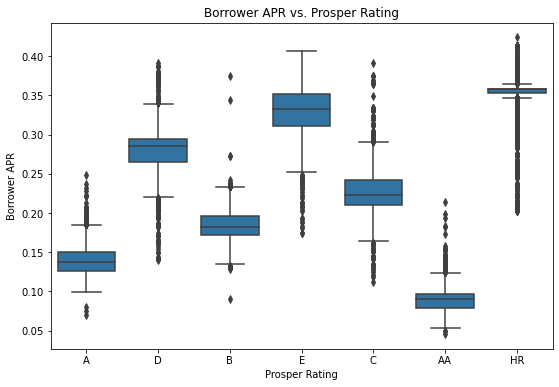

In [5]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_data, x='prosper_rating_alpha', y='borrower_apr', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Prosper Rating Effect on Relationship between APR and Estimated Return

> The Estimated Return seems to be decreasing with better Prosper Rating. While the Borrower APR is slightly unchanged.

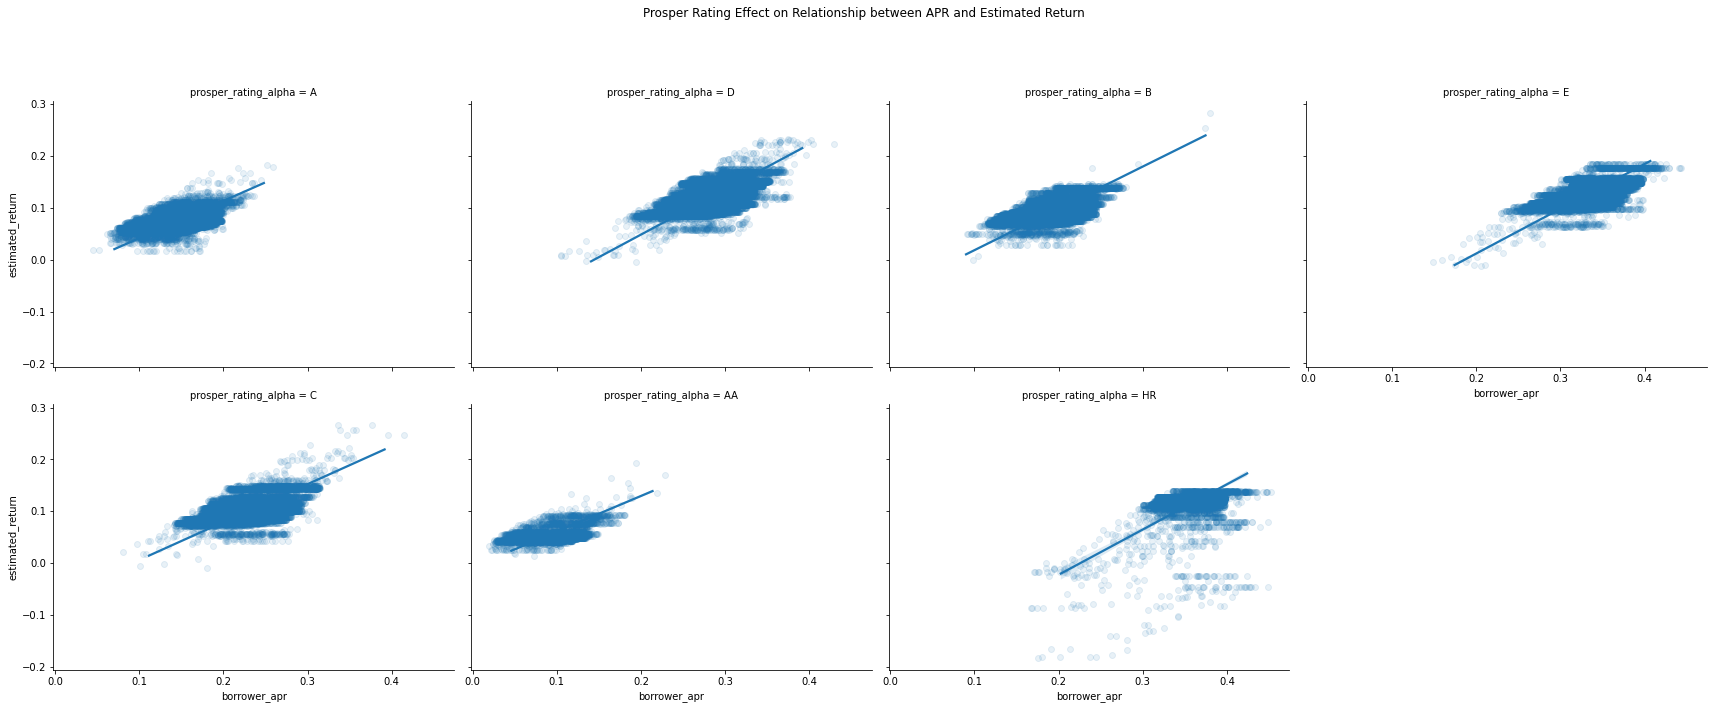

In [6]:
# Prosper rating effect on relationship of Borrower APR and Estimated Return
g=sb.FacetGrid(data=loan_data, aspect=1.2, height=5, col='prosper_rating_alpha', col_wrap=4)
g.map(sb.regplot, 'borrower_apr', 'estimated_return', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
plt.suptitle('Prosper Rating Effect on Relationship between APR and Estimated Return');
plt.subplots_adjust(top=0.85)

## Borrower APR by Rating and Term

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

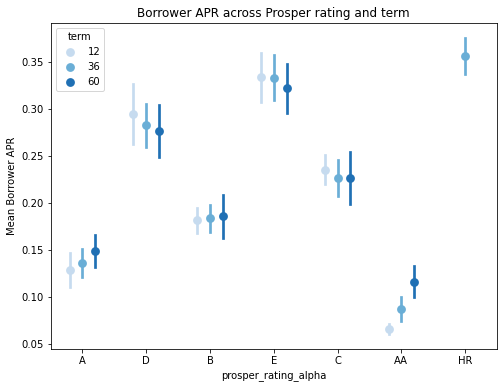

In [7]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_data, x = 'prosper_rating_alpha', y = 'borrower_apr', hue = 'term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Prosper rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);